# Ski Resorts Exploratory Data Analysis

## Overview - Analyze the datasets which contain the statistical data of the ski resorts across the world, identify the key factors of success and be profitable in a ski resort management. Provide the visualized data information and provide insights for our hypothetical to run the business effectively.

**Import Libraries and Datasets**

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [145]:
# Initialize the default style for the matplotlib
plt.style.use('ggplot')
# configure the default figure size for all plots
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12, 12)

In [146]:
# import datasets from the csv
resorts_df = pd.read_csv(r'./datasets/resorts.csv', encoding='cp1252')
snow_df = pd.read_csv(r'./datasets/snow.csv', encoding='cp1252')

**1. Previewing the head of each dataframe**

In [147]:
# change limits of rows and columns display

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [148]:
# resorts dataset
resorts_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928,8.383,Norway,Europe,46,November - May,1450,620,29,10,4,43,6,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,2,Geilosiden Geilo,60.535,8.206,Norway,Europe,44,November - April,1178,800,18,12,4,34,2,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,3,Golm,47.058,9.828,Austria,Europe,48,December - April,2110,650,13,12,1,26,9,123,4,4,3,11,16240,Yes,No,No,No
3,4,Red Mountain Resort-Rossland,49.106,-117.846,Canada,North America,60,December - April,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,Yes,Yes,Yes,No
4,5,Hafjell,61.230,10.529,Norway,Europe,45,November - April,1030,195,33,7,4,44,6,150,14,3,1,18,21060,Yes,Yes,Yes,No


In [149]:
snow_df.head()

,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.280
1,2022-12-01,63.125,69.125,100.000
2,2022-12-01,63.125,69.375,100.000
3,2022-12-01,63.125,69.625,100.000
4,2022-12-01,63.125,69.875,100.000


**2. Data Preparation**

In [150]:
# check total rows and columns in the dataset
resorts_df.shape

(499, 25)

In [151]:
# check total rows and columns in the dataset
snow_df.shape

(820522, 4)

**2.1. Datatype Verification**

In [152]:
# datatype verification
resorts_df.dtypes

resorts_df['Child friendly'].unique()


# resorts_df


array(['Yes', 'No'], dtype=object)

In [153]:
resorts_df['Snowparks'].unique()

array(['Yes', 'No'], dtype=object)

In [154]:
resorts_df['Nightskiing'].unique()

array(['Yes', 'No'], dtype=object)

In [155]:
resorts_df['Summer skiing'].unique()

array(['No', 'Yes'], dtype=object)

In [156]:
# Only Yes, No are contained in the resorts_df
# Child friendly, Snowparks, Nightskiing, Summer skiing columns can be changed to boolean type
resorts_df['Child friendly'] = resorts_df['Child friendly'].map({'Yes': True, 'No': False})
resorts_df['Snowparks'] = resorts_df['Snowparks'].map({'Yes': True, 'No': False})
resorts_df['Nightskiing'] = resorts_df['Nightskiing'].map({'Yes': True, 'No': False})
resorts_df['Summer skiing'] = resorts_df['Summer skiing'].map({'Yes': True, 'No': False})

resorts_df[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']] = resorts_df[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']].astype('bool')

resorts_df[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']].head()


,Child friendly,Snowparks,Nightskiing,Summer skiing
0,True,True,True,False
1,True,True,True,False
2,True,False,False,False
3,True,True,True,False
4,True,True,True,False


In [157]:
# datatype verification
snow_df.dtypes

Month         object
Latitude     float64
Longitude    float64
Snow         float64
dtype: object

**2.2 Handle Duplication and Nulls**

In [158]:
# check null values
resorts_df.isna().sum()

ID                     0
Resort                 0
Latitude               0
Longitude              0
Country                0
Continent              0
Price                  0
Season                 0
Highest point          0
Lowest point           0
Beginner slopes        0
Intermediate slopes    0
Difficult slopes       0
Total slopes           0
Longest run            0
Snow cannons           0
Surface lifts          0
Chair lifts            0
Gondola lifts          0
Total lifts            0
Lift capacity          0
Child friendly         0
Snowparks              0
Nightskiing            0
Summer skiing          0
dtype: int64

In [159]:
# check null values
snow_df.isna().sum()

Month        0
Latitude     0
Longitude    0
Snow         0
dtype: int64

In [160]:
# check duplicate values
resorts_df[resorts_df.duplicated()]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing


In [161]:
# check duplicate values
snow_df[snow_df.duplicated()]

# no nulls and duplicate values found, move on to the next step

,Month,Latitude,Longitude,Snow


**2.3. Data Transform**

In [162]:
import sys
import os

sys.path.append(os.path.abspath('./utils'))

import utils
# module updates handle
import importlib

importlib.reload(utils)

# remove invalid characters from the string
# define a function to transform the invalid characters
pattern = r'[^a-zA-Z0-9\s\w-]'

# check number of invalid characters inside the columns
invalid_mask = resorts_df['Resort'].str.contains(pattern, regex=True)

invalid_count = resorts_df[invalid_mask]['Resort'].count()
invalid_count

211

In [163]:
# hyphens are allowed in the column data
resorts_df = utils.remove_invalid_characters(resorts_df, columns=['Resort'])
resorts_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928,8.383,Norway,Europe,46,November - May,1450,620,29,10,4,43,6,325,15,6,0,21,22921,True,True,True,False
1,2,Geilosiden Geilo,60.535,8.206,Norway,Europe,44,November - April,1178,800,18,12,4,34,2,100,18,6,0,24,14225,True,True,True,False
2,3,Golm,47.058,9.828,Austria,Europe,48,December - April,2110,650,13,12,1,26,9,123,4,4,3,11,16240,True,False,False,False
3,4,Red Mountain Resort-Rossland,49.106,-117.846,Canada,North America,60,December - April,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,True,True,True,False
4,5,Hafjell,61.230,10.529,Norway,Europe,45,November - April,1030,195,33,7,4,44,6,150,14,3,1,18,21060,True,True,True,False


In [164]:
# Check any invalid characters in the column
resorts_df['Country'].unique()

array(['Norway', 'Austria', 'Canada', 'New Zealand', 'Chile', 'Germany',
       'Switzerland', 'Italy', 'France', 'United Kingdom',
       'United States', 'Andorra', 'Australia', 'Argentina', 'Finland',
       'Japan', 'Slovenia', 'Bulgaria', 'Spain', 'Sweden', 'Lebanon',
       'Russia', 'Ukraine', 'Georgia', 'Serbia', 'Turkey', 'Slovakia',
       'Poland', 'Bosnia and Herzegovina', 'Czech Republic', 'Iran',
       'South Korea', 'Romania', 'Greece', 'Liechtenstein', 'Lithuania',
       'Kazakhstan', 'China'], dtype=object)

In [165]:
# Check any invalid characters in the column
resorts_df['Continent'].unique()

array(['Europe', 'North America', 'Oceania', 'South America', 'Asia'],
      dtype=object)

In [166]:
# The original dataset described the information in a human readable representation, one of the example is the Season column, which represent the period of time by using english month to english month.

# We can break this into two separate columns like "Season From" and "Season To" to make it easier for the periodic analysis

# Check any invalid characters in the column
resorts_df['Season'].unique()

array(['November - May', 'November - April', 'December - April',
       'June - September', 'June - October', 'Year-round',
       'October - June', 'September - June', 'December - March',
       'October - May',
       'December - April, June - August, October - November',
       'July - September', 'November - May, June - August',
       'May - September', 'December - May', 'July', 'September - May',
       'October - April', 'April', 'Unknown', 'July - April',
       'May - October', 'November - June', 'September - April', 'May',
       'June - May', 'November - March', 'March', 'December',
       'October - November, December - May, June - October',
       'July - October'], dtype=object)

In [167]:
# unknown season found - for now, we can just ignore this
resorts_df.query('Season == "Unknown"').head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
123,124,Courmayeur Checrouit - Val Veny,45.787,6.973,Italy,Europe,46,Unknown,2755,1205,16,21,4,41,0,280,4,8,6,18,24497,True,True,False,False
181,182,Mondole Ski-Artesina-Frabosa Soprana-Prato Nevoso,44.249,7.775,Italy,Europe,33,Unknown,807,803,42,51,11,104,0,0,19,14,0,33,26068,True,True,True,False
233,234,Mzaar Kfardebian,33.972,35.840,Lebanon,Asia,51,Unknown,2465,1850,46,30,4,80,0,0,0,0,0,0,0,True,False,False,False
241,242,Jay Peak,47.631,-120.830,United States,North America,70,Unknown,1175,563,15,31,30,76,0,0,2,6,1,9,11675,True,False,False,False
299,300,Oppdal,62.535,9.623,Norway,Europe,44,Unknown,1300,585,40,7,9,56,0,0,1,0,0,1,0,True,False,False,False


In [168]:

# separating Season to "Season From" and "Season To"
# symbols in the column are ',' and '-'

tmp_df = resorts_df.copy()

# Spliting multiple Seaons Resort for future analysis
tmp_df['Split_Season'] = tmp_df['Season'].str.split(r'[,-]')
tmp_df['Split_Season']

# check if the seasons in the list are paired
tmp_df['Split_Season'].apply(len).unique()

array([2, 6, 4, 1], dtype=int64)

In [169]:
# filtering "Season From" by modding the value index, if the index remains 1 then the index should be like [0, 2, 4]
def filter_from(lst):
    if len(lst) == 1:
        return [lst[0]]
    return [value for index, value in enumerate(lst) if index % 2 == 1]

# filtering "Season To" by modding the value index, if the index remains 0 then the index should be like [1, 3, 5]
def filter_to(lst):
    if len(lst) == 1:
        return []
    return [value for index, value in enumerate(lst) if index % 2 == 0]

tmp_df['Season From'] = tmp_df['Split_Season'].apply(filter_from)
tmp_df['Season To'] = tmp_df['Split_Season'].apply(filter_to)

tmp_df = tmp_df.drop(['Season', 'Split_Season'], axis=1)
resorts_df = tmp_df.copy()


In [170]:
# standardize the decimal places of the latitude and longitude to comply with the snow_df
resorts_df[['Latitude', 'Longitude']] = resorts_df[['Latitude', 'Longitude']].round(3)
resorts_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To
0,1,Hemsedal,60.928,8.383,Norway,Europe,46,1450,620,29,10,4,43,6,325,15,6,0,21,22921,True,True,True,False,[ May],[November ]
1,2,Geilosiden Geilo,60.535,8.206,Norway,Europe,44,1178,800,18,12,4,34,2,100,18,6,0,24,14225,True,True,True,False,[ April],[November ]
2,3,Golm,47.058,9.828,Austria,Europe,48,2110,650,13,12,1,26,9,123,4,4,3,11,16240,True,False,False,False,[ April],[December ]
3,4,Red Mountain Resort-Rossland,49.106,-117.846,Canada,North America,60,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,True,True,True,False,[ April],[December ]
4,5,Hafjell,61.230,10.529,Norway,Europe,45,1030,195,33,7,4,44,6,150,14,3,1,18,21060,True,True,True,False,[ April],[November ]


**3. Exploratory Data Analysis**

In [171]:
# Review the columns inside the resorts dataframe
resorts_df.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Season From',
       'Season To'],
      dtype='object')

In [172]:
# Review the columns inside the snow dataframe
snow_df.columns

Index(['Month', 'Latitude', 'Longitude', 'Snow'], dtype='object')

In [173]:
snow_df

,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.280
1,2022-12-01,63.125,69.125,100.000
2,2022-12-01,63.125,69.375,100.000
3,2022-12-01,63.125,69.625,100.000
4,2022-12-01,63.125,69.875,100.000
...,...,...,...,...
820517,2022-01-01,-53.375,-68.375,1.570
820518,2022-01-01,-54.375,-36.625,33.860
820519,2022-01-01,-54.625,-69.375,3.940
820520,2022-01-01,-55.375,-68.875,1.970


In [174]:
resorts_df.loc[(resorts_df['Latitude'] >= 63) & (resorts_df['Longitude'] >=68)]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To


In [175]:
# Latitude and longitude are the two significant columns that are showing relationship 

# Test case - find related resort using latitude and longitude
merge_df = pd.merge(
    resorts_df,
    snow_df,
    on=['Latitude', 'Longitude'],
    suffixes=('_df1', '_df2')
)

In [176]:
# merged dataframe is empty, no relationship between two datasets
merge_df

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To,Month,Snow


In [177]:
resorts_df[['Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity']].describe()

,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
count,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000,499.000
mean,48.721,2160.589,1200.631,31.820,37.922,16.164,85.906,3.545,179.136,11.283,9.721,3.259,24.263,31650.962
std,21.719,774.340,596.142,47.402,44.359,20.116,100.874,3.948,372.321,13.365,11.462,5.868,27.673,40781.986
min,0.000,163.000,36.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,36.000,1594.000,800.000,10.000,12.000,3.000,30.000,0.000,0.000,3.000,3.000,0.000,10.000,11645.000
50%,45.000,2175.000,1121.000,18.000,25.000,9.000,55.000,3.000,15.000,7.000,6.000,1.000,15.000,18510.000
75%,54.000,2700.000,1500.000,30.000,45.000,21.000,100.000,6.000,180.000,14.000,11.500,4.000,26.000,32829.000
max,141.000,3914.000,3286.000,312.000,239.000,126.000,600.000,16.000,2383.000,89.000,74.000,40.000,174.000,252280.000


In [178]:
resorts_df[[ 'Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity']].corr(numeric_only=True)

,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
Price,1.000,0.381,0.369,0.119,0.312,0.572,0.307,0.262,0.077,-0.025,0.234,0.123,0.111,0.152
Highest point,0.381,1.000,0.782,0.296,0.417,0.487,0.419,0.280,0.177,0.162,0.300,0.300,0.266,0.279
Lowest point,0.369,0.782,1.000,-0.012,0.071,0.304,0.086,-0.009,-0.105,-0.118,0.027,-0.102,-0.068,-0.055
Beginner slopes,0.119,0.296,-0.012,1.000,0.775,0.537,0.918,0.065,0.776,0.833,0.860,0.781,0.924,0.930
Intermediate slopes,0.312,0.417,0.071,0.775,1.000,0.714,0.946,0.213,0.645,0.713,0.780,0.737,0.824,0.822
Difficult slopes,0.572,0.487,0.304,0.537,0.714,1.000,0.766,0.208,0.337,0.402,0.570,0.449,0.525,0.532
Total slopes,0.307,0.419,0.086,0.918,0.946,0.766,1.000,0.166,0.716,0.785,0.861,0.780,0.901,0.905
Longest run,0.262,0.280,-0.009,0.065,0.213,0.208,0.166,1.000,0.129,0.076,0.068,0.203,0.108,0.111
Snow cannons,0.077,0.177,-0.105,0.776,0.645,0.337,0.716,0.129,1.000,0.680,0.705,0.781,0.786,0.816
Surface lifts,-0.025,0.162,-0.118,0.833,0.713,0.402,0.785,0.076,0.680,1.000,0.739,0.643,0.925,0.861


**Use Heatmap to visualize the correlation map**

<Axes: >

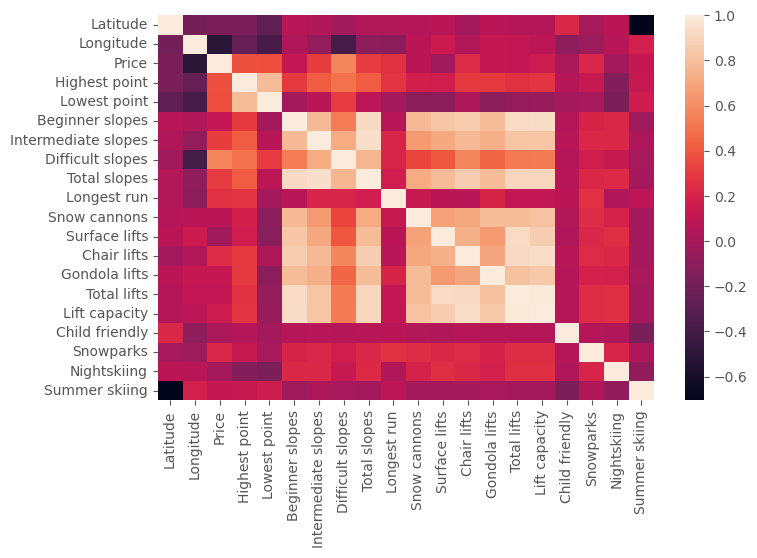

In [179]:
# heatmap
plt.figure(figsize=(8, 5))
# get all numerical columns except the ID
sns.heatmap(resorts_df.loc[:, resorts_df.columns !='ID'].corr(numeric_only=True))

**3.1. Relationship Sampling - Total amount of slopes compare with different levels of slope by Continent to see their relationship**
1. Beginner Slopes vs Total Slopes
2. Intermediate Slopes vs Total Slopes
3. Difficult Slopes vs Total Slopes

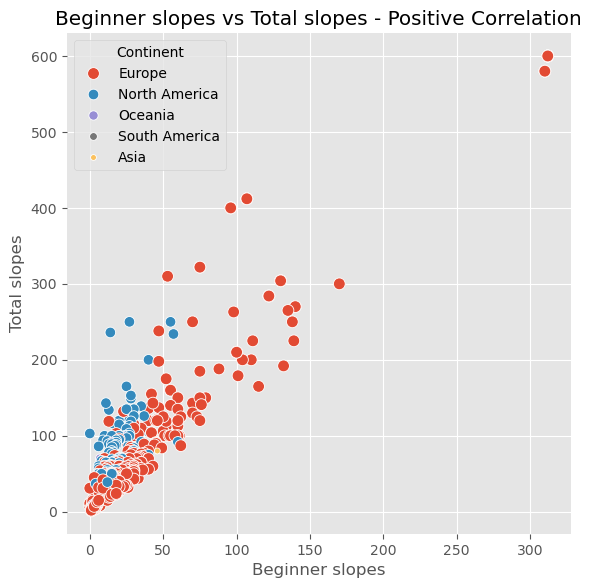

In [180]:
# Example - Use scatter_plt to check the relationship between Beginner slopes and total slopes
bvt_splt = utils.scatterplot_generator(resorts_df, "Beginner slopes", "Total slopes","Beginner slopes vs Total slopes - Positive Correlation", "Beginner slopes", "Total slopes", hue="Continent", size="Continent")

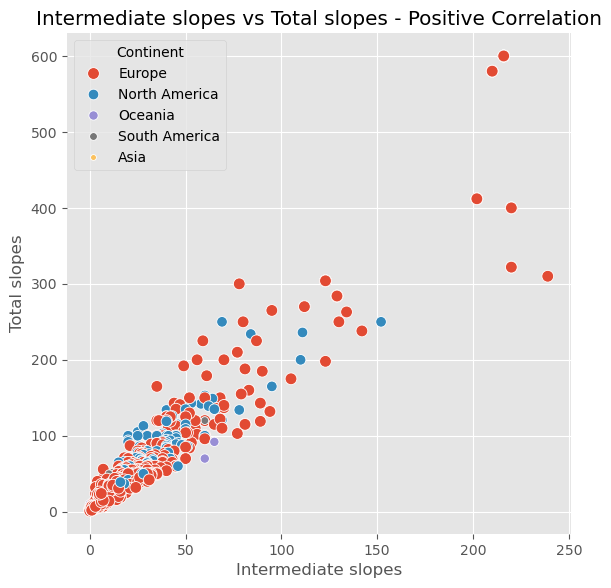

In [181]:
# Example - Use scatter_plt to check the relationship between Intermediate slopes and total slopes
ivt_splt = utils.scatterplot_generator(resorts_df, "Intermediate slopes", "Total slopes","Intermediate slopes vs Total slopes - Positive Correlation", "Intermediate slopes", "Total slopes", hue="Continent", size="Continent")

**Using the 'Continent' column as the parameters of hue and size, we can see Europe and North America dominate every difficulty of slopes in the total number of slopes, which significantly represents these two regions having more slope selection in different difficulties.**

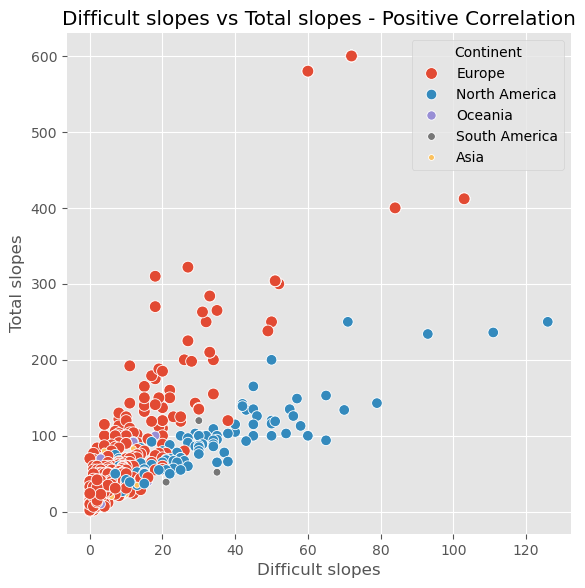

In [182]:
# Example - Use scatter_plt to check the relationship between Intermediate slopes and total slopes
dvt_splt = utils.scatterplot_generator(resorts_df, "Difficult slopes", "Total slopes","Difficult slopes vs Total slopes - Positive Correlation", "Difficult slopes", "Total slopes", hue="Continent", size="Continent")

**3.2. Relationship Sampling - Types of lift compare with the slopes difficulties**

In [183]:
resorts_df.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Season From',
       'Season To'],
      dtype='object')

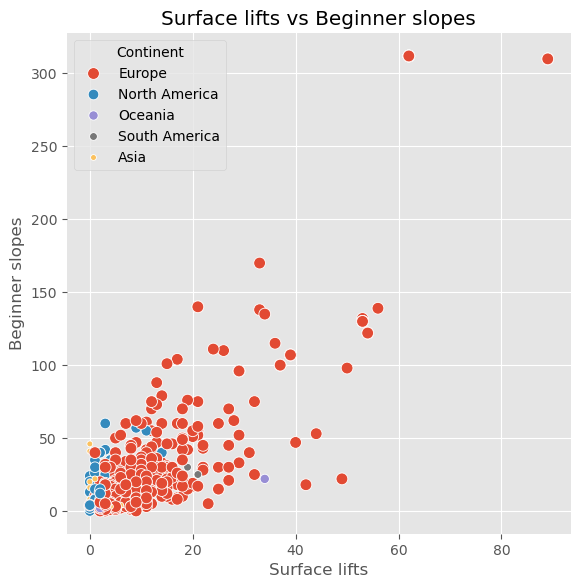

In [184]:
slvb_splt = utils.scatterplot_generator(resorts_df, "Surface lifts", "Beginner slopes", "Surface lifts vs Beginner slopes", "Surface lifts", "Beginner slopes", hue="Continent", size="Continent")

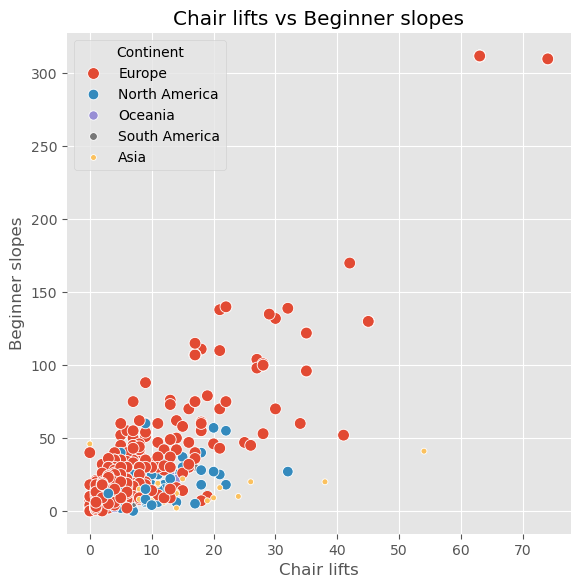

In [185]:
clvb_splt = utils.scatterplot_generator(resorts_df, "Chair lifts", "Beginner slopes", "Chair lifts vs Beginner slopes", "Chair lifts", "Beginner slopes", hue="Continent", size="Continent")

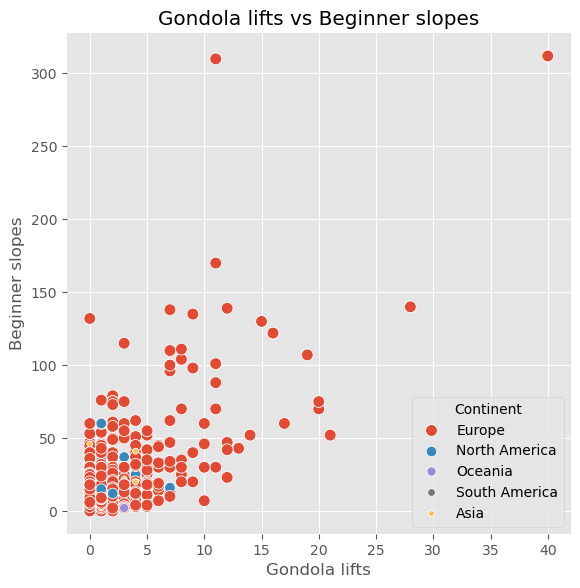

In [186]:
glvb_splt = utils.scatterplot_generator(resorts_df, "Gondola lifts", "Beginner slopes", "Gondola lifts vs Beginner slopes", "Gondola lifts", "Beginner slopes", hue="Continent", size="Continent")

Here, we use two types of slope difficulty (Beginner and Difficult )to determine whether the difficulty is the factor affecting the lift building selection. We can see that the Difficult slopes column has even smaller correlation with the Gondola lifts column, which results in no direct effect on the lift selection.

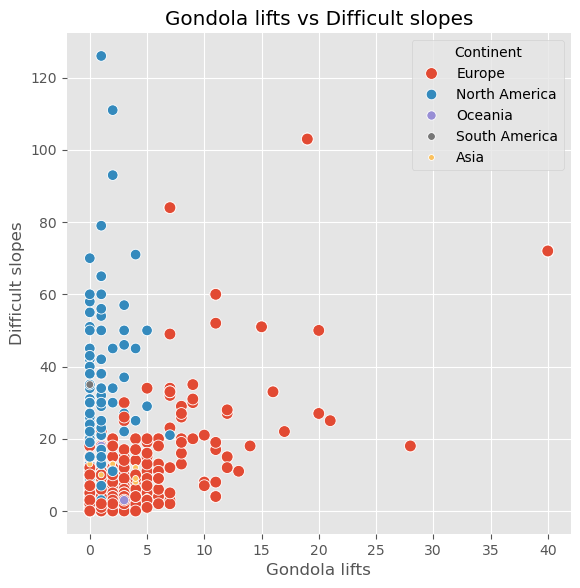

In [187]:
glvb_splt = utils.scatterplot_generator(resorts_df, "Gondola lifts", "Difficult slopes", "Gondola lifts vs Difficult slopes", "Gondola lifts", "Difficult slopes", hue="Continent", size="Continent")

**3.3. Relatioship Sampling - Capacity vs Types of Lift**

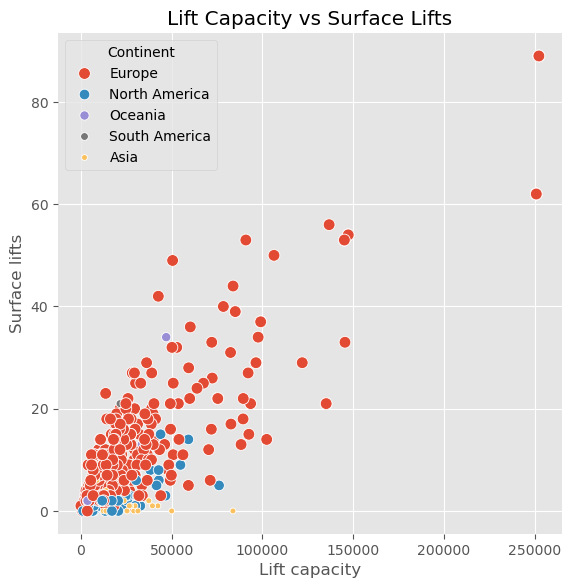

In [188]:
cvsl_splt = utils.scatterplot_generator(resorts_df,  "Lift capacity", "Surface lifts", "Lift Capacity vs Surface Lifts", "Lift capacity", "Surface lifts", hue="Continent", size="Continent")

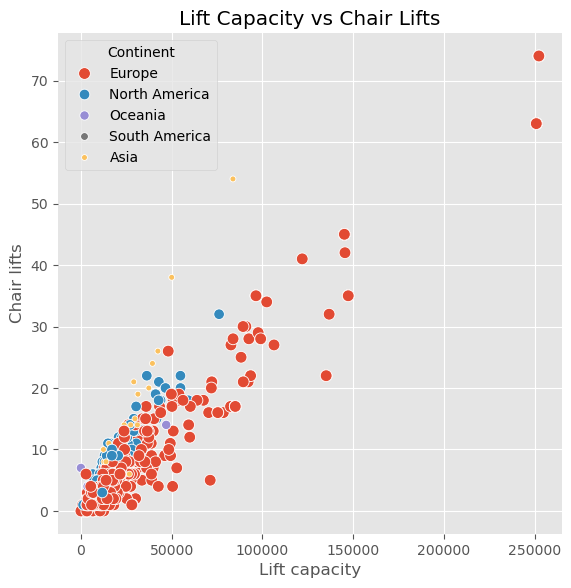

In [189]:
cvcl_splt = utils.scatterplot_generator(resorts_df,  "Lift capacity", "Chair lifts", "Lift Capacity vs Chair Lifts", "Lift capacity", "Chair lifts", hue="Continent", size="Continent")

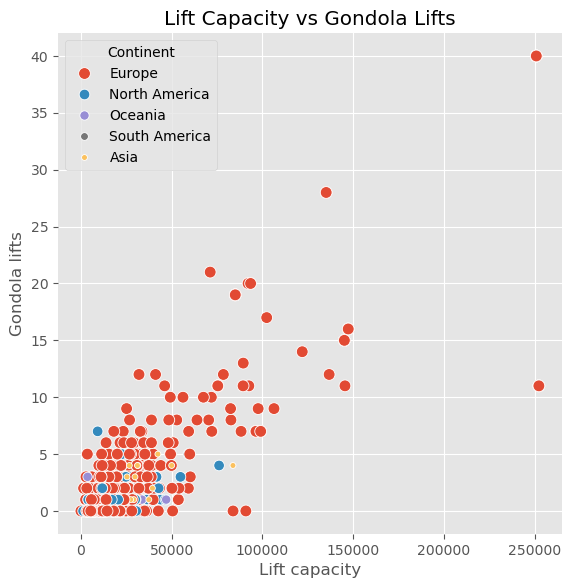

In [190]:
cvgl_splt = utils.scatterplot_generator(resorts_df, "Lift capacity", "Gondola lifts", "Lift Capacity vs Gondola Lifts", "Lift capacity", "Gondola lifts", hue="Continent", size="Continent")

## Question 1: Which Country is the most profitable for building a new ski resort?

Let's get the min, max, mean of the ticket price group by `Continent` and `Country`, and generate a new datafram called `tpbcc_df` to represent the the ticket price by continent and country.

In [191]:
# using groupby function and mean to get the avg ticket price of each continent and country
tpbcc_df = resorts_df.groupby(['Continent', 'Country']).agg(
    Price_min = pd.NamedAgg(column="Price", aggfunc='min'),
    Price_max = pd.NamedAgg(column="Price", aggfunc='max'),
    Price_mean = pd.NamedAgg(column="Price", aggfunc='mean')
).reset_index().copy()


# find the differece of price for future ticket price estimates by using max - min
tpbcc_df['Price_diff'] = tpbcc_df['Price_max'] - tpbcc_df['Price_min']

# set 3 decimal places
pd.options.display.float_format = '{:.3f}'.format
tpbcc_df.head()

,Continent,Country,Price_min,Price_max,Price_mean,Price_diff
0,Asia,China,0,0,0.000,0
1,Asia,Georgia,14,14,14.000,0
2,Asia,Iran,31,31,31.000,0
3,Asia,Japan,35,57,42.000,22
4,Asia,Kazakhstan,24,24,24.000,0


Now we have calculated the price difference and the mean, we can use a general ideal price formula to calculate the new ticket price for reference.
$$
Ideal Price=mean+0.5×(max−min)
$$

In [192]:
# create a new column for the ideal price
tpbcc_df['Ideal Price'] = tpbcc_df['Price_mean'] + 0.5 * (tpbcc_df['Price_diff'])
tpbcc_df

,Continent,Country,Price_min,Price_max,Price_mean,Price_diff,Ideal Price
0,Asia,China,0,0,0.000,0,0.000
1,Asia,Georgia,14,14,14.000,0,14.000
2,Asia,Iran,31,31,31.000,0,31.000
3,Asia,Japan,35,57,42.000,22,53.000
4,Asia,Kazakhstan,24,24,24.000,0,24.000
5,Asia,Lebanon,51,51,51.000,0,51.000
6,Asia,South Korea,0,57,28.500,57,57.000
7,Asia,Turkey,0,17,5.667,17,14.167
8,Europe,Andorra,37,47,43.000,10,48.000
9,Europe,Austria,29,55,44.247,26,57.247


Let's say we want to find out the mean of ticket price in North America and Europe, we use loc to run our query and filter the results

In [193]:
tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]

,Continent,Country,Price_min,Price_max,Price_mean,Price_diff,Ideal Price
8,Europe,Andorra,37,47,43.000,10,48.000
9,Europe,Austria,29,55,44.247,26,57.247
10,Europe,Bosnia and Herzegovina,20,20,20.000,0,20.000
11,Europe,Bulgaria,18,30,26.000,12,32.000
12,Europe,Czech Republic,23,34,28.500,11,34.000
13,Europe,Finland,42,43,42.667,1,43.167
14,Europe,France,0,62,38.321,62,69.321
15,Europe,Germany,19,45,29.227,26,42.227
16,Europe,Greece,30,30,30.000,0,30.000
17,Europe,Italy,0,54,41.614,54,68.614


Now we have the `Ideal Price` for our ticket price reference, let's use the `Price_mean` vs `Ideal Price` to see how we should formulate our ticket pricing in different `Continent`

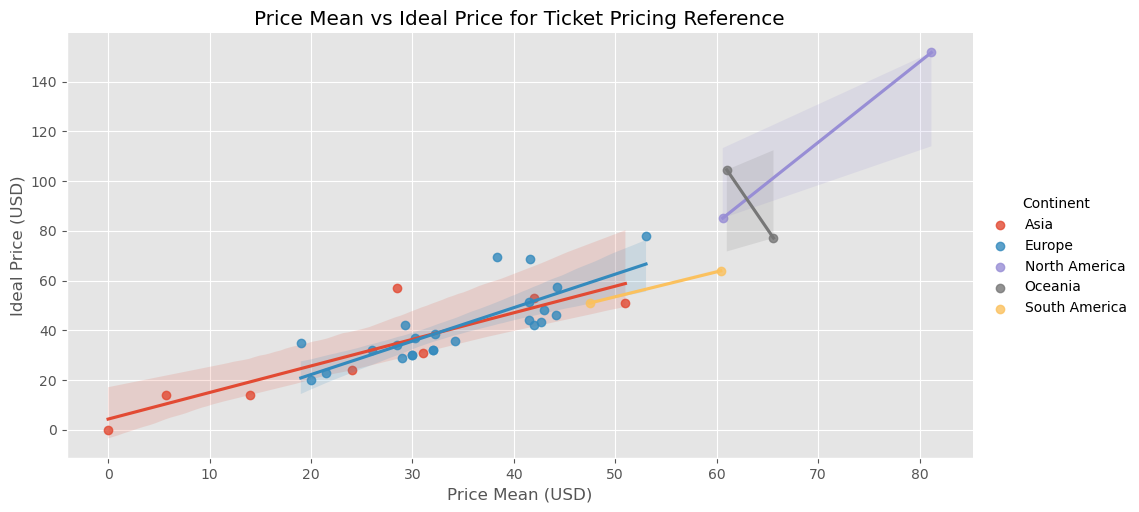

In [194]:
pmvid_lmplt = sns.lmplot(tpbcc_df, x="Price_mean", y="Ideal Price", aspect=2, hue="Continent")
pmvid_lmplt.set(title="Price Mean vs Ideal Price for Ticket Pricing Reference", xlabel="Price Mean (USD)", ylabel="Ideal Price (USD)")


The scatter plot gives us a better idea of how we should approach ticket pricing. The positive trend indicates that the formula we utilized for generating the Ideal Price can boost revenue without raising the ticket price over market levels.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Andorra'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Bosnia and Herzegovina'),
  Text(3, 0, 'Bulgaria'),
  Text(4, 0, 'Czech Republic'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Greece'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Liechtenstein'),
  Text(11, 0, 'Lithuania'),
  Text(12, 0, 'Norway'),
  Text(13, 0, 'Poland'),
  Text(14, 0, 'Romania'),
  Text(15, 0, 'Russia'),
  Text(16, 0, 'Serbia'),
  Text(17, 0, 'Slovakia'),
  Text(18, 0, 'Slovenia'),
  Text(19, 0, 'Spain'),
  Text(20, 0, 'Sweden'),
  Text(21, 0, 'Switzerland'),
  Text(22, 0, 'Ukraine'),
  Text(23, 0, 'United Kingdom'),
  Text(24, 0, 'Canada'),
  Text(25, 0, 'United States')])

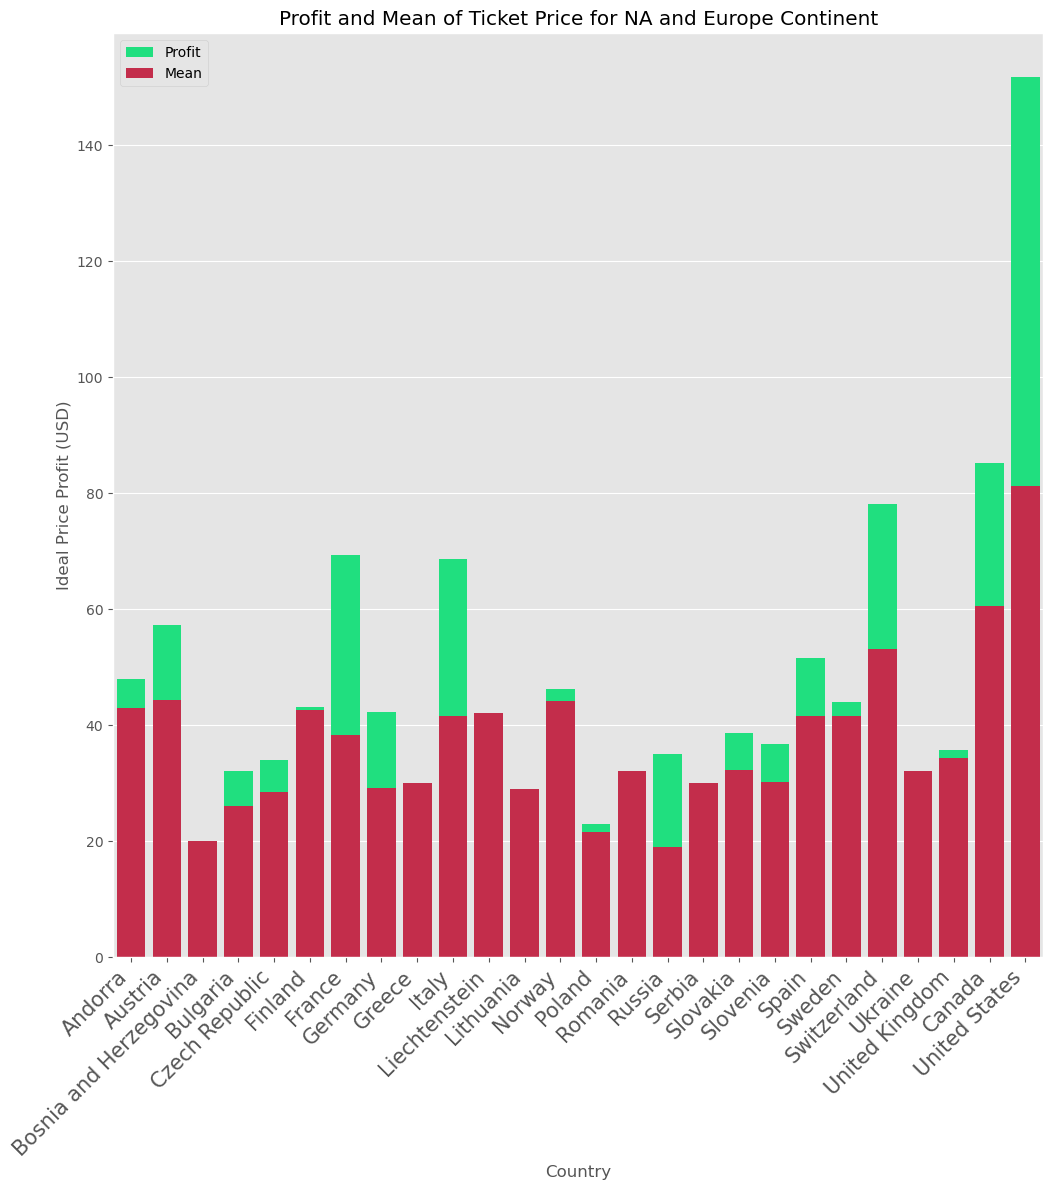

In [195]:
pvm_bplt = sns.barplot(tpbcc_df, x=tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Country'], y=tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Ideal Price'], label='Profit', color="springgreen")
pvm_bplt = sns.barplot(tpbcc_df, x=tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Country'], y=tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Price_mean'], label='Mean', color="crimson")

pvm_bplt.set_title('Profit and Mean of Ticket Price for NA and Europe Continent')
pvm_bplt.set_ylabel('Ideal Price Profit (USD)')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15)


The profit and mean comparisons between the NA and European countries have been carried out using the bar plot above. It demonstrates that when looking at all the countries together, the US has a sizable profit. We can draw the conclusion that the greatest place to establish a ski resort in order to make the most revenue is the United States.

In [196]:
tpbcc_df['Price_mean'].describe()

count   38.000
mean    36.801
std     16.315
min      0.000
25%     28.625
50%     33.225
75%     43.900
max     81.167
Name: Price_mean, dtype: float64

The United States might potentially make more revenue, we can use it as an example and use the `describe()` function to drill down into different aspects.

In [197]:
tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America')]['Price_mean'].describe()

count    2.000
mean    70.883
std     14.543
min     60.600
25%     65.742
50%     70.883
75%     76.025
max     81.167
Name: Price_mean, dtype: float64

In [198]:
tpbcc_df['Ideal Price'].describe()

count    38.000
mean     46.735
std      27.437
min       0.000
25%      31.250
50%      42.114
75%      56.000
max     151.667
Name: Ideal Price, dtype: float64

In [199]:
tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America')]['Ideal Price'].describe()

count     2.000
mean    118.383
std      47.070
min      85.100
25%     101.742
50%     118.383
75%     135.025
max     151.667
Name: Ideal Price, dtype: float64

In this dataset, we don't have the `Cost` for our net profit margin calculation. Instead, we can use `Price_mean` as a substitute to calculate the net profit margin of building a ski resort in the North America and Europe.

$$
Net Profit Margin = \frac{Ideal Price - Price Mean}{Price Mean}
$$

In [200]:
# net profit margin
data = {
    'Country': tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Country'],
    'Net Profit Margin': (tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Ideal Price'] - tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Price_mean']) / tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Price_mean'],
    'Price Mean': tpbcc_df.loc[(tpbcc_df['Continent'] == 'North America') | (tpbcc_df['Continent'] == 'Europe')]['Price_mean']
}
npm_df = pd.DataFrame(data)

npm_df.sort_values(by="Net Profit Margin", ascending=False).head()

,Country,Net Profit Margin,Price Mean
33,United States,0.869,81.167
23,Russia,0.842,19.000
14,France,0.809,38.321
17,Italy,0.649,41.614
29,Switzerland,0.471,53.034


In [201]:
# show country that has profit margin higher than 0.5
npm_df.loc[(npm_df['Net Profit Margin'] > 0.5)].sort_values(by="Net Profit Margin", ascending=False)


,Country,Net Profit Margin,Price Mean
33,United States,0.869,81.167
23,Russia,0.842,19.000
14,France,0.809,38.321
17,Italy,0.649,41.614


**Question 1 Conclusion:** Given the over 0.5 net profit margin, I recommend businesses that are operating in North America consider building a new ski resort in the US. For European businesses, consider building it in Russia.

In [202]:
resorts_df

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To
0,1,Hemsedal,60.928,8.383,Norway,Europe,46,1450,620,29,10,4,43,6,325,15,6,0,21,22921,True,True,True,False,[ May],[November ]
1,2,Geilosiden Geilo,60.535,8.206,Norway,Europe,44,1178,800,18,12,4,34,2,100,18,6,0,24,14225,True,True,True,False,[ April],[November ]
2,3,Golm,47.058,9.828,Austria,Europe,48,2110,650,13,12,1,26,9,123,4,4,3,11,16240,True,False,False,False,[ April],[December ]
3,4,Red Mountain Resort-Rossland,49.106,-117.846,Canada,North America,60,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,True,True,True,False,[ April],[December ]
4,5,Hafjell,61.230,10.529,Norway,Europe,45,1030,195,33,7,4,44,6,150,14,3,1,18,21060,True,True,True,False,[ April],[November ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Puigmal,42.395,2.109,France,Europe,0,2700,1830,9,15,7,31,0,0,11,2,0,13,11865,True,False,False,False,[Unknown],[]
495,496,Kranzberg-Mittenwald,47.451,11.229,Germany,Europe,29,1350,980,6,7,2,15,2,8,9,1,0,10,5850,True,True,True,False,[December],[]
496,497,Wetterstein lifts-Wettersteinbahnen- Ehrwald,47.407,10.928,Austria,Europe,43,1530,1000,15,5,3,23,3,33,6,4,0,10,5425,True,True,False,False,[ March],[December ]
497,498,Stuhleck-Spital am Semmering,47.574,15.790,Austria,Europe,42,1774,777,18,6,0,24,0,240,7,2,0,9,14400,True,True,True,False,[April],[]


C:\Users\louis.lei\AppData\Local\Temp\ipykernel_10508\757222334.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: xlabel='x', ylabel='y'>

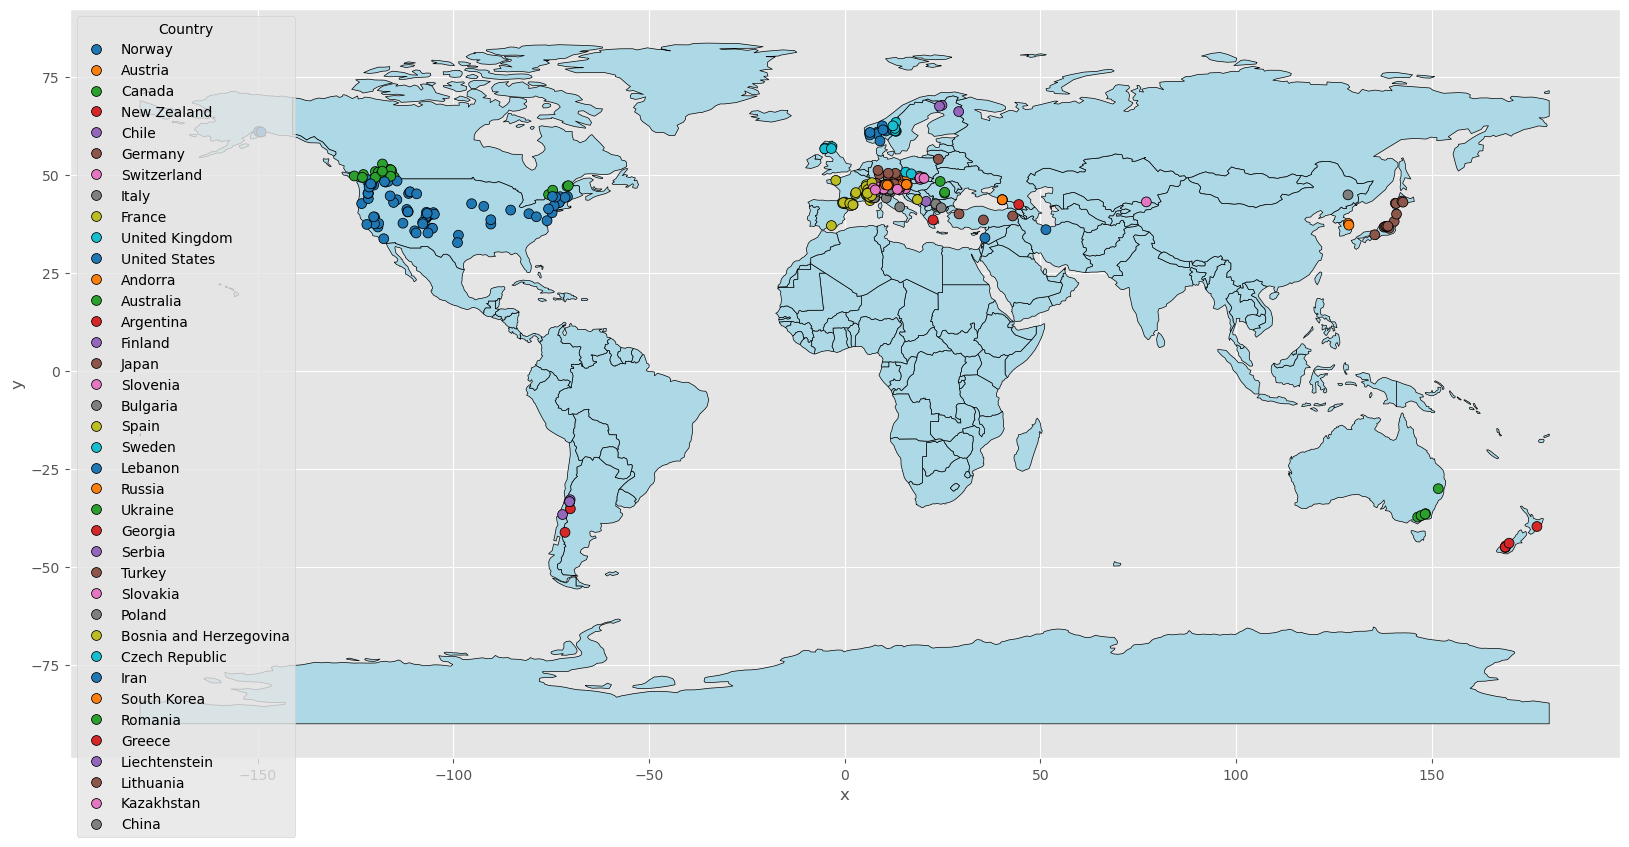

In [203]:
# world map
import geopandas as gpd
import geodatasets
from shapely.geometry import Point, Polygon

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(resorts_df['Longitude'], resorts_df['Latitude'])]
geo_df = gpd.GeoDataFrame(resorts_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(20, 20))

world.plot(ax=ax, color='lightblue', edgecolor='black')

# combine with seaborn scatter plots
geo_df['x'] = geo_df.geometry.x
geo_df['y'] = geo_df.geometry.y

sns.scatterplot(geo_df, x='x', y='y', hue="Country", ax=ax, s=50, palette='tab10', edgecolor='black')

c:\Users\louis.lei\anaconda3\envs\jupyter_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\louis.lei\AppData\Local\Temp\ipykernel_10508\2196563543.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Spectral', len(visframe))


<Axes: xlabel='Longitude', ylabel='Latitude'>

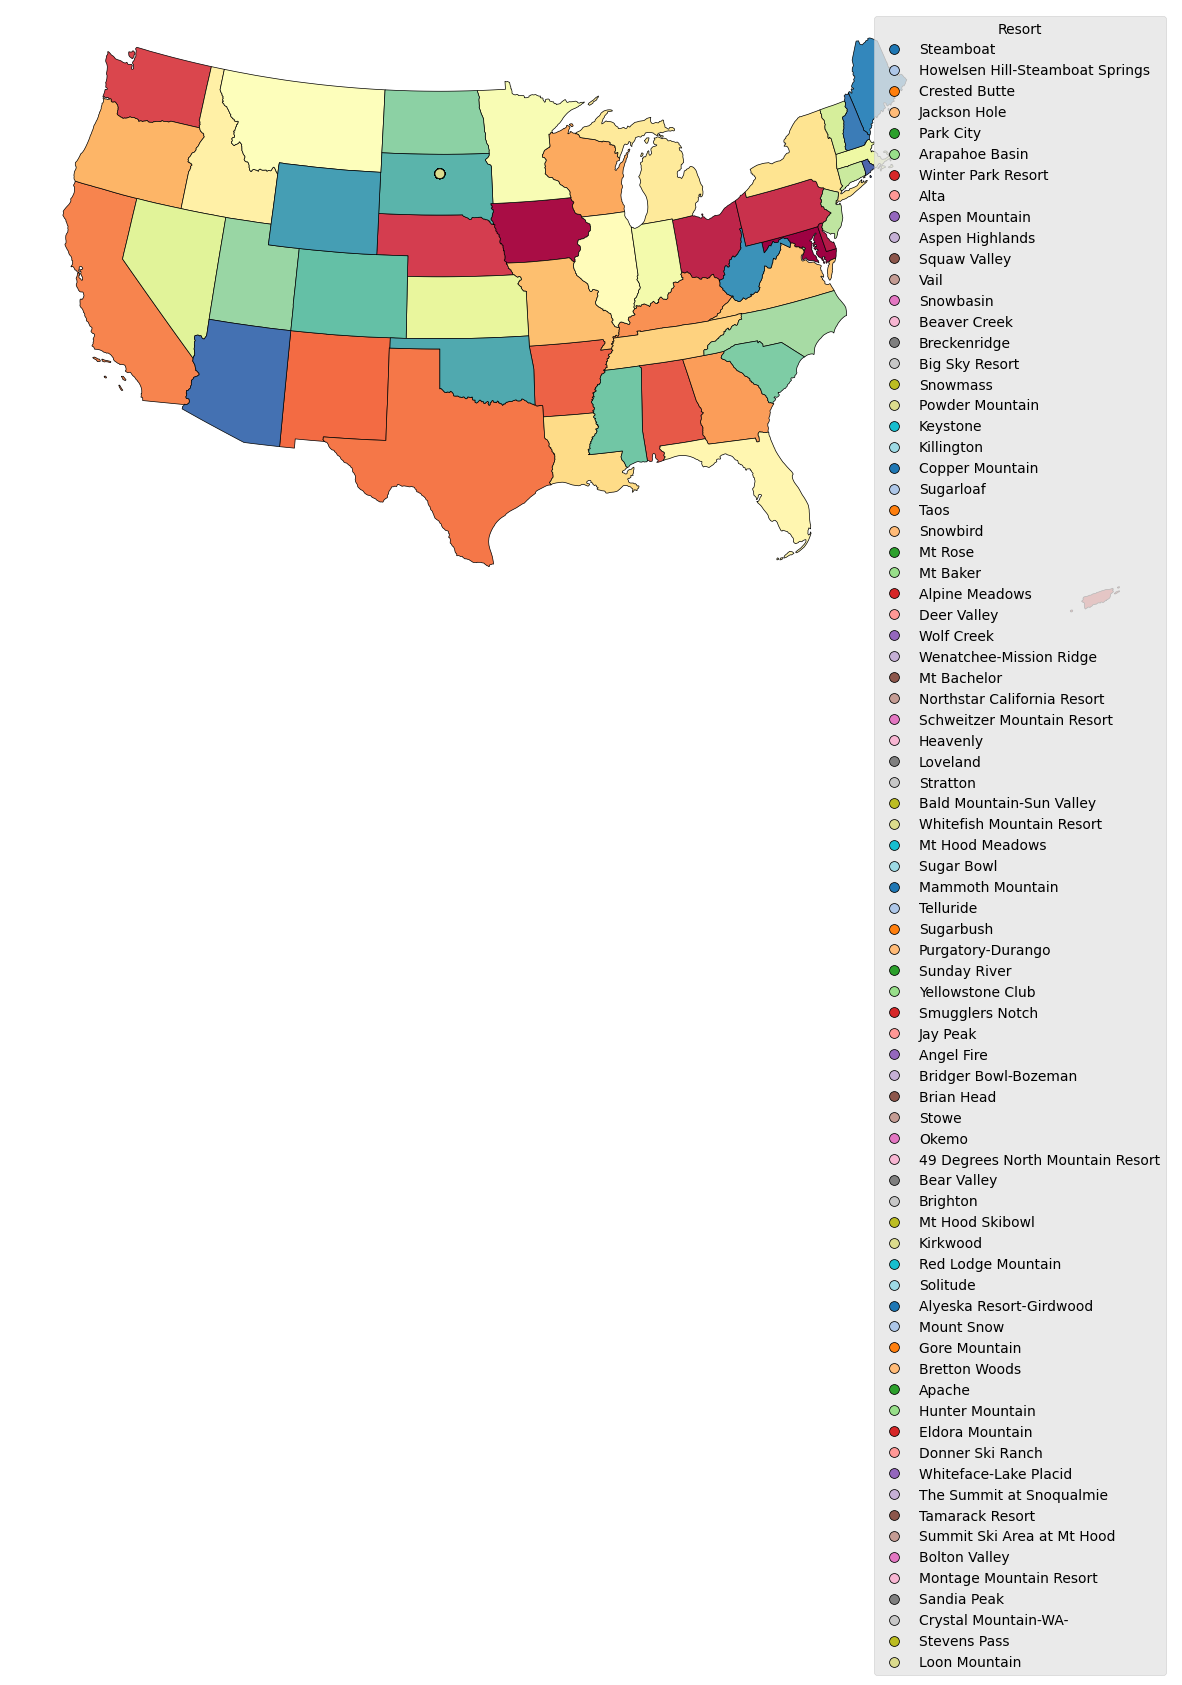

In [204]:
# Look up to the united states map

us_shapefile = './datasets/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(us_shapefile)
visframe = gdf.to_crs({'init':'epsg:2163'})

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')

colors = plt.cm.get_cmap('Spectral', len(visframe))

# Show the US map plot excluding HI and AK states
visframe[~visframe['STUSPS'].isin(['HI', 'AK'])].plot(ax=ax, color=[colors(i) for i in range(len(visframe))], edgecolor='black')

# us = world[world.name == 'United States of America']

# Filter out the data that's related to the United States
# us_resorts_df = resorts_df.loc[resorts_df['Country'] == 'United States'].copy()
# # Get Geometry from Latitude and Longitude
# us_geometry = [Point(xy) for xy in zip(us_resorts_df['Longitude'], us_resorts_df['Latitude'])]
# # Generate a GeoDataFrame
# us_geo_df = gpd.GeoDataFrame(us_resorts_df, geometry=us_geometry)

# # combine with seaborn scatter plots
# us_geo_df['x'] = us_geo_df.geometry.x
# us_geo_df['y'] = us_geo_df.geometry.y

sns.scatterplot(resorts_df[resorts_df['Country'] == 'United States'], x='Longitude', y='Latitude', hue="Resort", ax=ax, s=50, palette='tab20', edgecolor='black')